# Introducción a la Minería de datos
La función **run_scenarios(df, din)** recibe el set de datos en un dataframe de pandas **df** y un diccionario **din** que contiene todas las variables de entrada al modelo utilizado, en este caso **Random Forest**. 
* **TPutils ** es un modulo que contiene las funciones necesarias para correr el modelo.
* **sklearn** es la libreria de scikit-learn con las funciones necesarias para acceder a las funciones básicas de los algoritmos para la minería de datos.

In [2]:
import os
from TPutils import prepare_data, preproDataSet, run_scenarios, test_models
import pandas as pd
from scipy.stats import randint as sp_randint

pd.options.display.float_format = '{:,.4f}'.format

# Parameters by default to pass to the clf.
default_dict = {'n_estimators': 20,
                'random_state': 101,
                'n_jobs': -1,
                'criterion': "entropy",
                #verbose=0, 
                #warm_start=False, 
                #class_weight=None,
                #min_weight_fraction_leaf=0.0, 
                #max_features='auto', 
                #max_leaf_nodes=None, 
                #min_impurity_decrease=0.0, 
                #min_impurity_split=None,  
                #oob_score=False,
                }

# specify parameters and distributions to sample from
param_dist = {#"criterion": ["gini", "entropy"],
              "max_depth": [17, None],
              "max_features": sp_randint(1, 35), # cambiar estos valores!
              "min_samples_split": sp_randint(2, 20), # creo que deberia haber al menos 17
              "bootstrap": [True, False], # No se que hace esta variable
              }

vlist = [0.05, 0.10, 0.25, 0.33, 0.45, 0.55, 0.66]
iterlist = [20, 50, 70, 100]

t_size = vlist[3]
# Inicializo una carpeta de trabajo
nfolder = 2
newpath = "run-"+ str(nfolder)
if not os.path.exists(newpath): os.makedirs(newpath)

df = pd.read_csv("./banco2.csv")

# Preprocessing
df = preproDataSet(df)
print('Dataset Shape: ', df.shape)

os.chdir(newpath)        
for t_size in vlist:
    din = {'test_size': t_size,
           'clf_name': 'RandomForest', #clf_list = ['RandomForest', 'SVM']
           'n_iter_search': 50,
           'n_top': 20,
           'n_best': 4,
           'q': 1/16,
           }
    
    # Split in train and test data:
    xtrain, ytrain, xtest, ytest = prepare_data(df, t_size, rnd_state=101)

    
    # Run scenarios: 
    dresults = run_scenarios(xtrain, ytrain,din, default_dict, param_dist)

    # Testing Models:
    test_models(dresults,din, default_dict, xtrain, ytrain, xtest, ytest)

os.chdir('../')
print('End')

Dataset Shape:  (36115, 36)
Training Data:  (34309, 35)
Testting Data:  (1806, 35)
RandomizedSearchCV took 272.93 seconds for 50 candidates parameter settings.
   MeanTestScore   Rank  StdTestScore  bootstrap max_depth  max_features  \
0    29,475.0000 1.0000   17,582.6086     0.0000      None       17.0000   
1    26,175.0000 2.0000   22,491.2159     0.0000        17       19.0000   
2    26,158.3333 3.0000   22,609.0767     1.0000        17       25.0000   
3    25,191.6667 4.0000   15,171.8604     1.0000        17       28.0000   
4    25,108.3333 5.0000   29,479.0097     0.0000        17       18.0000   

   min_samples_split  
0             6.0000  
1            18.0000  
2             9.0000  
3            14.0000  
4            12.0000  
Ganancia Si a todo:  13200 
Ganancia con my_cutoff:  116800
Ganancia Si a todo:  13200 
Ganancia con my_cutoff:  125300
Ganancia Si a todo:  13200 
Ganancia con my_cutoff:  124000
Ganancia Si a todo:  13200 
Ganancia con my_cutoff:  126000
Train

In [ ]:
#from TPutils import report2, random_search, get_best_scenarios, testing_scenarios, preproDataSet




In [5]:
from TPutils import ganancia, my_cutoff
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

#ytest = np.random.randint(0,2,100)
#y_prob = [r for r in np.random.rand(100)]
#y = []
#xlist = np.linspace(0,1,30)
#for x in xlist:
#    new_y_pred = [1 if yp >= x else 0 for yp in y_prob]
#    y.append(ganancia(ytest, new_y_pred))

# Como re-abrir uno de los modelos entrenados:
from joblib import load
import pandas as pd
from TPutils import save_ganancia_vs_p, preproDataSet, prepare_data, ganancia

def choose_best_cutoff(ytest, y_prob):
    xlist = np.linspace(0,0.5,50)
    y = []
    for x in xlist:
        new_y_pred = [1 if yp >= x else 0 for yp in y_prob[:,1]]
        y.append(ganancia(ytest, new_y_pred))

    ind = np.argmax(y)
    #print(ind, y, y[ind])
    return [xlist[ind], y[ind]]




vlist = [0.05, 0.10, 0.25, 0.33, 0.45, 0.55, 0.66]
t_size = vlist[3]
clf_name = 'RandomForest'
df = pd.read_csv("./banco2.csv")

# Preprocessing
df = preproDataSet(df)
print('Dataset Shape: ', df.shape)

# Split in train and test data:
xtrain, ytrain, xtest, ytest = prepare_data(df, t_size, rnd_state=101)

clf_file = "./run-2/Trained_RandomForest_"+'0_1547781911'+".joblib"

best_clf = load(clf_file)

ypred = best_clf.predict(xtest) # Prediccion por default
yprob = best_clf.predict_proba(xtest) # Probabilidades de la prediccion    

#xlist = np.linspace(0,1,30)
#y = []
#for x in xlist:
#    new_y_pred = [1 if yp >= x else 0 for yp in yprob[:,1]]
#    y.append(ganancia(ytest, new_y_pred))

#ind = np.argmax(y)
#print(xlist[ind], y[ind], ind)
    
#xcoords = [1/17, 1/16, 0.5]
#colors = ['b','r','k']

#for xc,c in zip(xcoords,colors):
#    plt.axvline(x=xc, label='p = {0:.4}'.format(xc), c=c)

#plt.legend()

#plt.plot(xlist, y ,'g.')
#plt.show()

print(choose_best_cutoff(ytest, yprob))

Dataset Shape:  (36115, 36)
Training Data:  (24197, 35)
Testting Data:  (11918, 35)
[0.12244897959183673, 1009600]


In [ ]:
#print(np.random.randint(0,2,100))
#print(y)
#print(np.argmax(y))
choose_best_cutoff(ytest, yprob)

In [ ]:
print(y[ind], ind)

In [6]:
# Como re-abrir uno de los modelos entrenados:
from joblib import load
import pandas as pd
from TPutils import save_ganancia_vs_p, preproDataSet

vlist = [0.05, 0.10, 0.25, 0.33, 0.45, 0.55, 0.66]
t_size = vlist[3]
clf_name = 'RandomForest'
df = pd.read_csv("./banco2.csv")

# Preprocessing
df = preproDataSet(df)
print('Dataset Shape: ', df.shape)

# Split in train and test data:
xtrain, ytrain, xtest, ytest = prepare_data(df, t_size, rnd_state=101)

#Load Model

tstamp = ['0_1547781911', '1_1547781913', '2_1547781915']
for ts in tstamp:
    clf_file = "./run-2/Trained_RandomForest_"+ts+".joblib"

    best_clf = load(clf_file)

    ypred = best_clf.predict(xtest) # Prediccion por default
    yprob = best_clf.predict_proba(xtest) # Probabilidades de la prediccion
    
    label = 'test_'+ts
    save_ganancia_vs_p(ytest, yprob, clf_name+"_"+str(label) )
    label = 'pred_'+ts
    save_ganancia_vs_p(ypred, yprob, clf_name+"_"+str(label) )

Dataset Shape:  (36115, 36)
Training Data:  (24197, 35)
Testting Data:  (11918, 35)


TypeError: unsupported operand type(s) for /: 'str' and 'int'

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fda5a98f7b8> (for post_execute):


TypeError: must be real number, not str

TypeError: unsupported operand type(s) for /: 'str' and 'int'

Dataset Shape:  (36115, 36)
Training Data:  (24197, 35)
Testting Data:  (11918, 35)
<class 'list'> 11918 <class 'pandas.core.series.Series'> 11918 23535    0
21003    0
20406    0
16784    0
24306    1
Name: y, dtype: int64
Confusion matrix, without normalization
Normalized confusion matrix


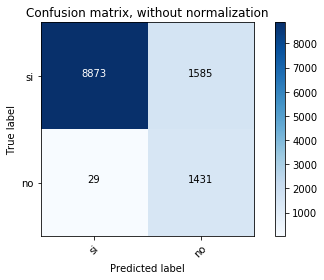

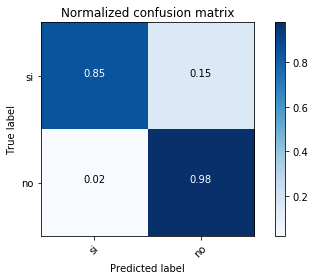

In [2]:
# Matriz de confusion
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from joblib import load
import pandas as pd
from TPutils import save_ganancia_vs_p, preproDataSet, plot_confusion_matrix, prepare_data, my_cutoff

vlist = [0.05, 0.10, 0.25, 0.33, 0.45, 0.55, 0.66]
t_size = vlist[3]
clf_name = 'RandomForest'
df = pd.read_csv("../banco2.csv")

# Preprocessing
df = preproDataSet(df)
print('Dataset Shape: ', df.shape)
class_names = ['si', 'no']
# Split in train and test data:
xtrain, ytrain, xtest, ytest = prepare_data(df, t_size, rnd_state=101)

#Load Model

tstamp = ['0_1543229236', '1_1543229238', '2_1543229240']
for ts in tstamp[:1]:
    clf_file = "./1_run/Trained_RandomForest_"+ts+".joblib"

    best_clf = load(clf_file)

    ypred = best_clf.predict(xtest) # Prediccion por default
    yprob = best_clf.predict_proba(xtest) # Probabilidades de la prediccion
    
    #label = 'test_'+ts
    #save_ganancia_vs_p(ytest, yprob, clf_name+"_"+str(label) )
    #label = 'pred_'+ts
    #save_ganancia_vs_p(ypred, yprob, clf_name+"_"+str(label) )
    
    new_ypred = my_cutoff(1/16, yprob)
    print(type(new_ypred), len(new_ypred), type(ytest),len(ytest), ytest.head())
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(ytest, new_ypred)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title='Normalized confusion matrix')

    plt.show()
plt.show()